## Census REST interface
The US Ceneus Bureau, who's all about collecting and sharing data, provides a number of REST-ful API for accessing data. These APIs are documented here: https://www.census.gov/data/developers/data-sets.html

This notebook provides example code how to access on of their API services, the [5-year Ammerican Community Service Data](https://www.census.gov/data/developers/data-sets/acs-5year.html).

* First we need import the Python packages needed to access this API

In [1]:
#Import modules
import requests
import pandas as pd

* If you are going to use this API in production mode, you'll need to sign up for a key. It's free and mostly just keeps track of usage so nobody abuses the service provided. For just tinkering around, you can set the key to `None` and most features will still work.

In [2]:
#Set the key
key = None

### American Community Survey 5-Year Data (2009-2015)
https://www.census.gov/data/developers/data-sets/acs-5year.html<br>
https://api.census.gov/data/2015/acs5/examples.html

* Here we construct the components of the REST-ful service, namely the service's endpoint and the parameters used to invoke the service to suit our needs. You'd need to consult the API documentation to determine what parameters are used and what values you'd include to get what you want.

In [3]:
#Endpoint and payload
baseURL = 'https://api.census.gov/data/2015/acs5'
payload = {'get':'NAME,B01001_001E',
           'for':'county:*',
           'in':'state:37',
           'key':key
          }

* Now to send off the request to the Census server and hold the response locally

In [4]:
# Sent the request and store the response
response = requests.get(baseURL,payload)

* Have a look at the repsonse object contents. We can access these contents both as text and as binary objects.

In [5]:
t = response.text
c = response.content
print(type(t), type(c))

<class 'str'> <class 'bytes'>


* Print the response as text.Looks like a list!

In [6]:
print (t)

[["NAME","B01001_001E","state","county"],
["Alamance County, North Carolina","155258","37","001"],
["Alexander County, North Carolina","37158","37","003"],
["Alleghany County, North Carolina","10911","37","005"],
["Anson County, North Carolina","26135","37","007"],
["Ashe County, North Carolina","27114","37","009"],
["Avery County, North Carolina","17695","37","011"],
["Beaufort County, North Carolina","47561","37","013"],
["Bertie County, North Carolina","20518","37","015"],
["Bladen County, North Carolina","34720","37","017"],
["Brunswick County, North Carolina","115926","37","019"],
["Buncombe County, North Carolina","247336","37","021"],
["Burke County, North Carolina","89548","37","023"],
["Cabarrus County, North Carolina","188375","37","025"],
["Caldwell County, North Carolina","81758","37","027"],
["Camden County, North Carolina","10161","37","029"],
["Carteret County, North Carolina","68228","37","031"],
["Caswell County, North Carolina","23174","37","033"],
["Catawba County, N

### 2012 Survey of Business Owners: Company Summary
https://www.census.gov/data/developers/data-sets/business-owners.html

* Variables: api.census.gov/data/2012/sbo

* From here, it's a matter of exploring and interpreting your results. Often you'll want to convert your results to a JSON object. This often yields a list or dictionary which we can control more easily than a long text object.

In [7]:
#Convert the response object to JSON format.
j = response.json()

In [8]:
#What type of variable is returned
type(j)

list

In [9]:
#Print the first two items in the list
j[0:2]

[['NAME', 'B01001_001E', 'state', 'county'],
 ['Alamance County, North Carolina', '155258', '37', '001']]

In [10]:
#Convert to a dataframe
dfACS = pd.DataFrame(j[1:],columns=j[0])
dfACS['B01001_001E'] = dfACS['B01001_001E'].astype('int')
dfACS.head(10)

,NAME,B01001_001E,state,county
0,"Alamance County, North Carolina",155258,37,001
1,"Alexander County, North Carolina",37158,37,003
2,"Alleghany County, North Carolina",10911,37,005
3,"Anson County, North Carolina",26135,37,007
4,"Ashe County, North Carolina",27114,37,009
5,"Avery County, North Carolina",17695,37,011
6,"Beaufort County, North Carolina",47561,37,013
7,"Bertie County, North Carolina",20518,37,015
8,"Bladen County, North Carolina",34720,37,017
9,"Brunswick County, North Carolina",115926,37,019


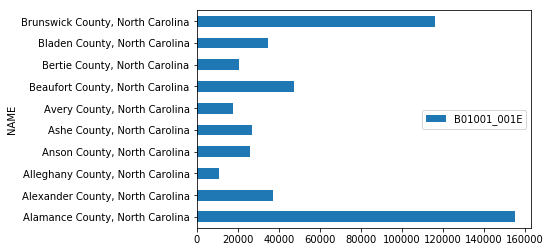

In [11]:
%matplotlib inline
dfACS.head(10).set_index('NAME').plot(kind='barh');